In [1]:
import numpy as np
import pandas as pd
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [2]:
diabetes_DS = pd.read_csv('data/diabetes.csv')

In [3]:
diabetes_DS.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [4]:
diabetes_DS.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


In [5]:
diabetes_DS.shape

(768, 9)

In [6]:
diabetes_DS['Outcome'].value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

0 - Non-Diabetic \
1 - Diabetic

In [7]:
df = diabetes_DS.groupby('Outcome').mean().T

In [8]:
df

Outcome,0,1
Pregnancies,3.298000,4.865672
Glucose,109.980000,141.257463
BloodPressure,68.184000,70.824627
SkinThickness,19.664000,22.164179
Insulin,68.792000,100.335821
BMI,30.304200,35.142537
DiabetesPedigreeFunction,0.429734,0.550500
Age,31.190000,37.067164


This formula calculates the percentage difference between values in columns labeled 0 and 1 in the DataFrame 'df'. The result is then stored in a new column labeled '%diff'. This formula is commonly used to measure the relative difference between two values.

In [9]:
df['%diff'] = (abs(df[0] - df[1] )/ ((df[0] + df[1])/2)) *100

In [10]:
df

Outcome,0,1,%diff
Pregnancies,3.298000,4.865672,38.406044
Glucose,109.980000,141.257463,24.898725
BloodPressure,68.184000,70.824627,3.799227
SkinThickness,19.664000,22.164179,11.954520
Insulin,68.792000,100.335821,37.301753
BMI,30.304200,35.142537,14.785572
DiabetesPedigreeFunction,0.429734,0.550500,24.640239
Age,31.190000,37.067164,17.220651


In [11]:
data = diabetes_DS.drop(columns= 'Outcome', axis=1)
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [12]:
import seaborn as sns
import matplotlib.pyplot as plt

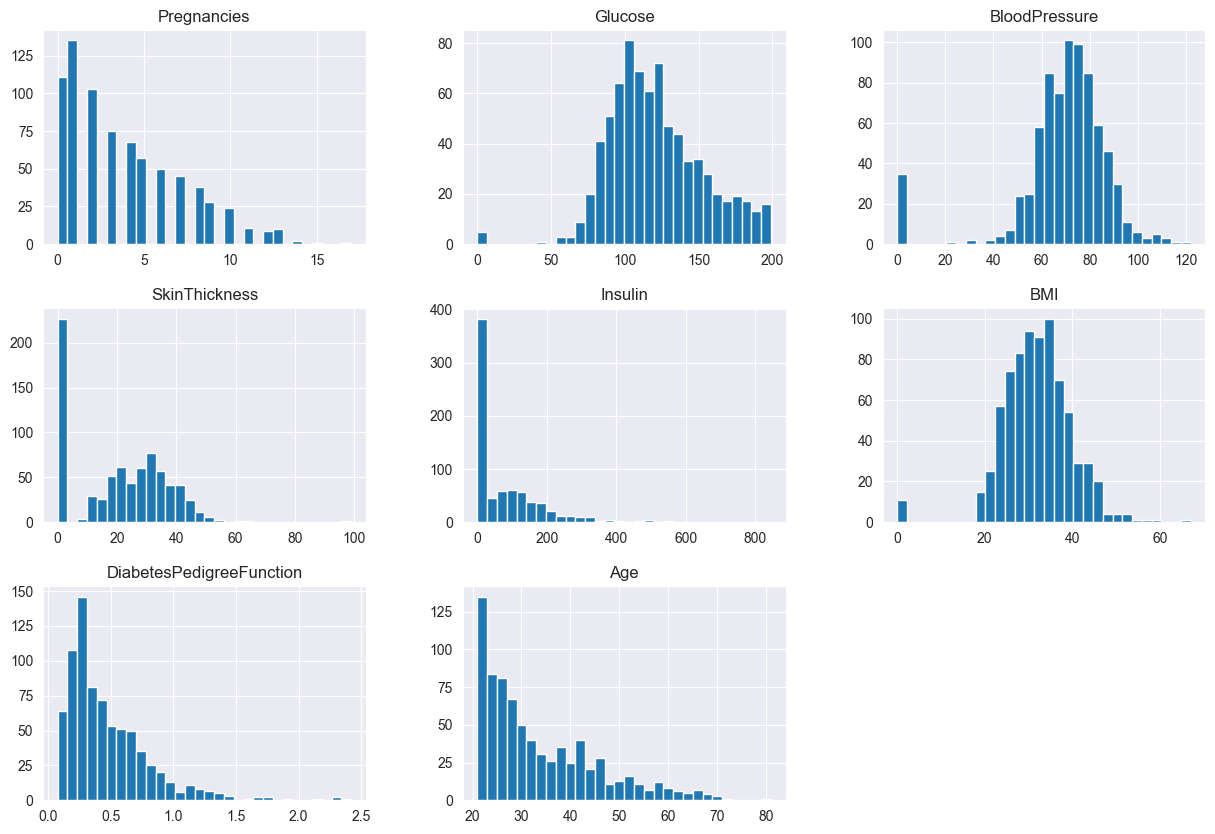

In [13]:
data.hist(bins=30, figsize=(15,10))
plt.show()

In [14]:
from pandas.plotting import scatter_matrix

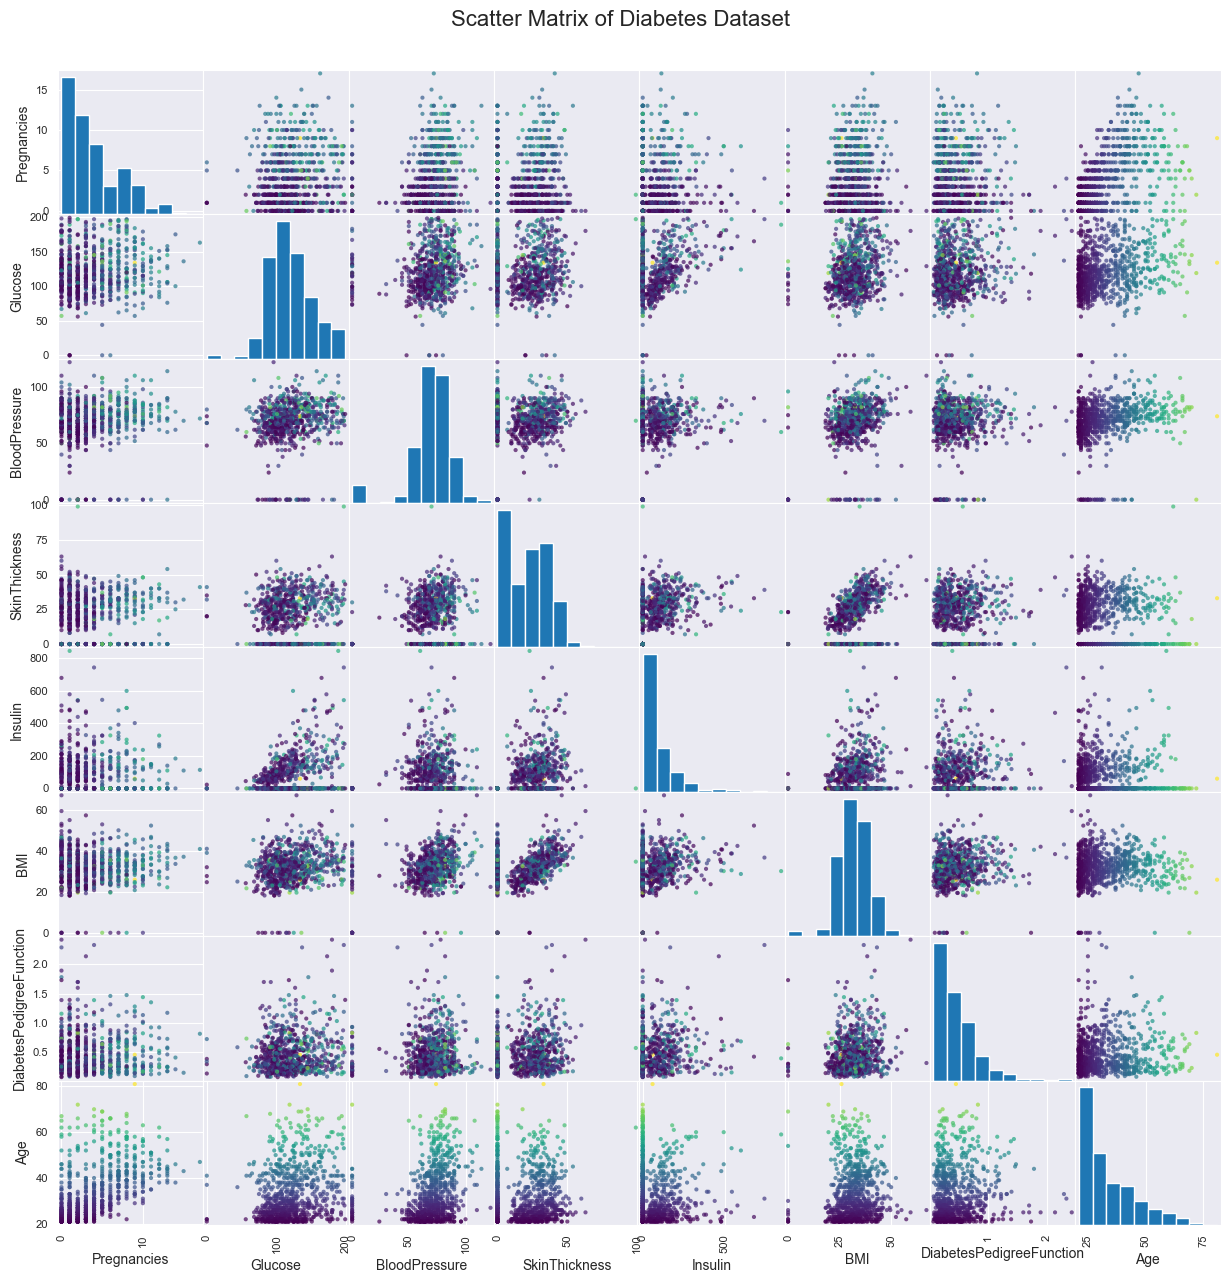

In [15]:
scatter_matrix(diabetes_DS.drop(columns= 'Outcome', axis=1), alpha=0.7, figsize=(15, 15), diagonal='hist', c=diabetes_DS['Age'], cmap='viridis')
plt.suptitle('Scatter Matrix of Diabetes Dataset', y=0.92, fontsize=16)
plt.show()

<Axes: >

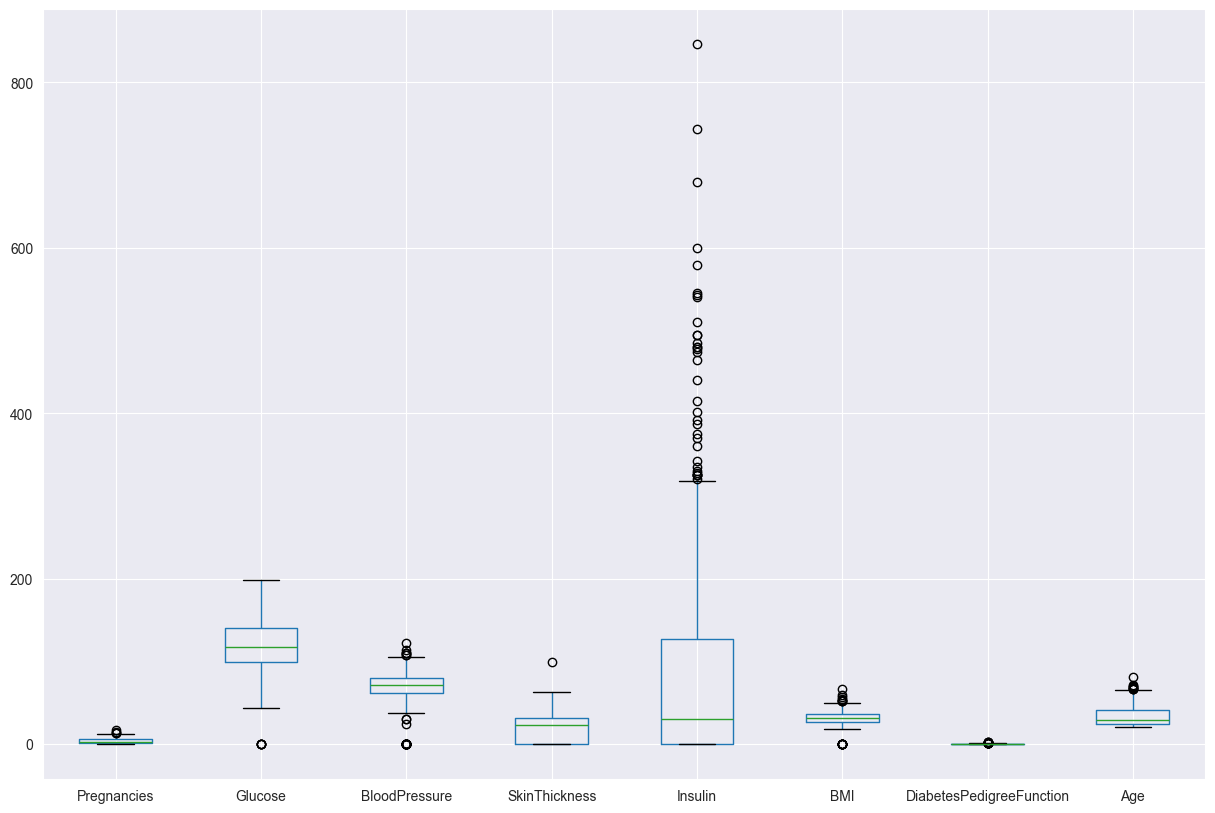

In [16]:
data.boxplot(figsize=(15,10))

In [17]:
corr_matrix = data.corr()
corr_matrix

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
Pregnancies,1.000000,0.129459,0.141282,-0.081672,-0.073535,0.017683,-0.033523,0.544341
Glucose,0.129459,1.000000,0.152590,0.057328,0.331357,0.221071,0.137337,0.263514
BloodPressure,0.141282,0.152590,1.000000,0.207371,0.088933,0.281805,0.041265,0.239528
SkinThickness,-0.081672,0.057328,0.207371,1.000000,0.436783,0.392573,0.183928,-0.113970
Insulin,-0.073535,0.331357,0.088933,0.436783,1.000000,0.197859,0.185071,-0.042163
BMI,0.017683,0.221071,0.281805,0.392573,0.197859,1.000000,0.140647,0.036242
DiabetesPedigreeFunction,-0.033523,0.137337,0.041265,0.183928,0.185071,0.140647,1.000000,0.033561
Age,0.544341,0.263514,0.239528,-0.113970,-0.042163,0.036242,0.033561,1.000000


<Axes: >

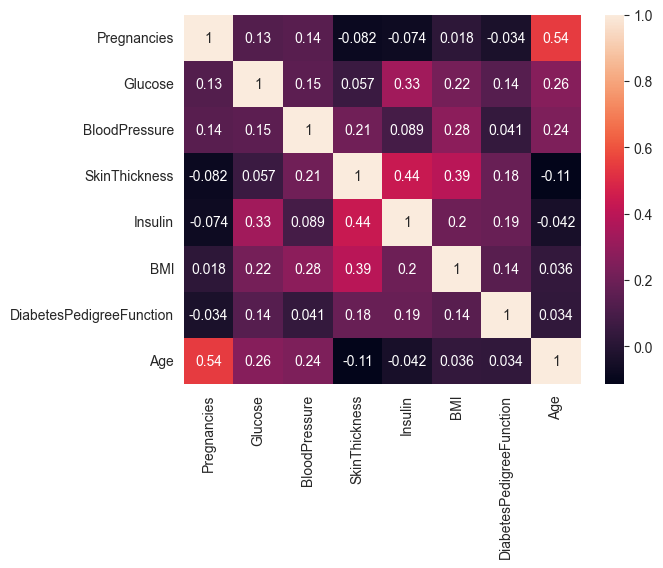

In [18]:
sns.heatmap(corr_matrix, annot= True)

In [19]:
X = data
Y = diabetes_DS['Outcome']

In [20]:
X.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age
0,6,148,72,35,0,33.6,0.627,50
1,1,85,66,29,0,26.6,0.351,31
2,8,183,64,0,0,23.3,0.672,32
3,1,89,66,23,94,28.1,0.167,21
4,0,137,40,35,168,43.1,2.288,33


In [21]:
Y.head()

0    1
1    0
2    1
3    0
4    1
Name: Outcome, dtype: int64

In [22]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size=0.2, stratify=Y, random_state=42)

In [23]:
print(X.shape, X_train.shape, X_test.shape)

(768, 8) (614, 8) (154, 8)


In [24]:
from sklearn.linear_model import LogisticRegression

In [25]:
logisticregression = LogisticRegression(solver='lbfgs', max_iter=200)

In [26]:
logisticregression.fit(X_train,Y_train)

LogisticRegression(max_iter=200)

In [27]:
from sklearn.metrics import classification_report

In [28]:
round(logisticregression.score(X_train, Y_train)*100, 2)

79.32

In [29]:
round(logisticregression.score(X_test, Y_test)*100, 2)

71.43

In [30]:
from sklearn.metrics import classification_report

In [31]:
Y_pred = logisticregression.predict(X_test)
Y_pred

array([1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1,
       0, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0,
       1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 1, 0, 1, 0,
       0, 1, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1, 0],
      dtype=int64)

In [32]:
print(Y_pred)

[1 0 0 0 0 0 0 1 0 1 0 1 0 0 0 0 1 0 1 0 0 1 0 1 1 0 1 0 0 0 0 0 0 1 1 0 0
 0 1 1 0 0 0 0 0 0 0 0 1 1 1 1 0 0 1 0 1 0 1 0 1 0 0 1 0 0 1 0 0 1 0 0 0 0
 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 1 1 0 0 0 1 0 1 1 0 0 0 0 0 1 0 1 0 1 0 0
 1 0 0 0 0 0 0 1 0 1 0 0 1 0 1 1 1 0 0 0 1 0 1 1 0 0 0 0 0 0 0 0 0 0 0 0 1
 1 0 0 0 1 0]


In [33]:
print(classification_report(Y_test, Y_pred))

              precision    recall  f1-score   support

           0       0.76      0.82      0.79       100
           1       0.61      0.52      0.56        54

    accuracy                           0.71       154
   macro avg       0.68      0.67      0.67       154
weighted avg       0.71      0.71      0.71       154



In [34]:
from sklearn.metrics import roc_curve, roc_auc_score
fpr, tpr, thresholds = roc_curve(Y_test, Y_pred)
roc_auc = roc_auc_score(Y_test, Y_pred)


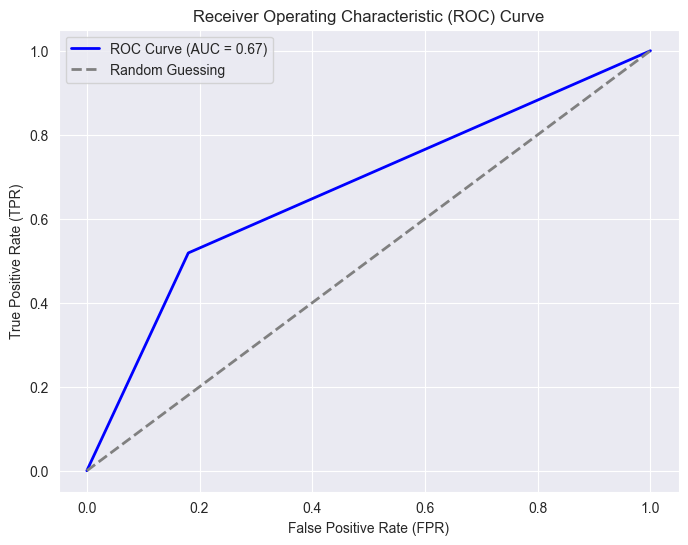

In [35]:
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC Curve (AUC = {roc_auc:.2f})')
plt.plot([0, 1], [0, 1], color='gray', linestyle='--', lw=2, label='Random Guessing')
plt.xlabel('False Positive Rate (FPR)')
plt.ylabel('True Positive Rate (TPR)')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend()
plt.show()

In [36]:
from sklearn.model_selection import StratifiedKFold, cross_val_score

In [37]:
cross_val_score(logisticregression, X , Y , cv=StratifiedKFold(n_splits=5))

array([0.77272727, 0.74675325, 0.75324675, 0.81045752, 0.77777778])

In [38]:
cross_val_score(logisticregression, X , Y , cv=StratifiedKFold(n_splits=5)).mean()

0.7721925133689839

# MLP model with tensorflow

In [39]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [48]:
import tensorflow as tf
model = tf.keras.Sequential([
    tf.keras.layers.Dense(20, activation='relu', input_shape=(8,)),
    tf.keras.layers.Dense(25, activation='relu'),
    tf.keras.layers.Dense(1, activation='sigmoid')
])

In [49]:
# Compile the model
model.compile(optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
              loss='binary_crossentropy',
              metrics=['accuracy' , tf.keras.metrics.AUC()])

# Print the model summary
model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_3 (Dense)             (None, 20)                180       
                                                                 
 dense_4 (Dense)             (None, 25)                525       
                                                                 
 dense_5 (Dense)             (None, 1)                 26        
                                                                 
Total params: 731 (2.86 KB)
Trainable params: 731 (2.86 KB)
Non-trainable params: 0 (0.00 Byte)
_________________________________________________________________


In [52]:
history = model.fit(X_train_scaled, Y_train, epochs=100, batch_size=140, validation_split=0.2)

Epoch 1/100
4/4 [==============================] - 0s 15ms/step - loss: 0.4955 - accuracy: 0.7637 - auc_1: 0.8292 - val_loss: 0.4825 - val_accuracy: 0.7724 - val_auc_1: 0.8518
Epoch 2/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4910 - accuracy: 0.7678 - auc_1: 0.8320 - val_loss: 0.4793 - val_accuracy: 0.7805 - val_auc_1: 0.8514
Epoch 3/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4872 - accuracy: 0.7699 - auc_1: 0.8346 - val_loss: 0.4763 - val_accuracy: 0.7805 - val_auc_1: 0.8517
Epoch 4/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4838 - accuracy: 0.7658 - auc_1: 0.8364 - val_loss: 0.4734 - val_accuracy: 0.7886 - val_auc_1: 0.8531
Epoch 5/100
4/4 [==============================] - 0s 7ms/step - loss: 0.4802 - accuracy: 0.7678 - auc_1: 0.8380 - val_loss: 0.4711 - val_accuracy: 0.7886 - val_auc_1: 0.8534
Epoch 6/100
4/4 [==============================] - 0s 8ms/step - loss: 0.4769 - accuracy: 0.7699 - auc_1: 0.8399 - val_loss:

In [53]:
# Evaluate the model on the test set
test_loss, test_accuracy, test_auc = model.evaluate(X_test_scaled, Y_test)
print(f'\nTest Accuracy: {test_accuracy * 100:.2f}%')
print(f'Test AUC: {test_auc:.4f}')

5/5 [==============================] - 0s 1ms/step - loss: 0.5115 - accuracy: 0.7403 - auc_1: 0.8156

Test Accuracy: 74.03%
Test AUC: 0.8156


In [54]:
 # Predict probabilities on the test set
y_pred_prob = model.predict(X_test_scaled)


5/5 [==============================] - 0s 750us/step


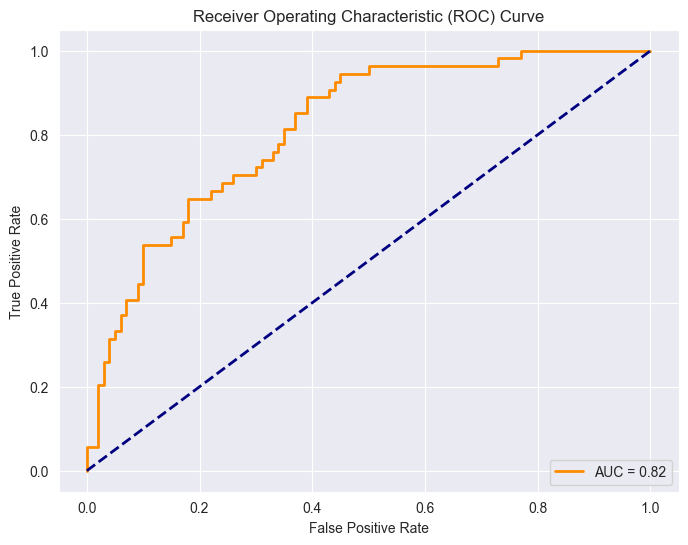

In [55]:
from sklearn.metrics import roc_curve, auc
fpr, tpr, _ = roc_curve(Y_test, y_pred_prob)
roc_auc = roc_auc_score(Y_test, y_pred_prob)
#roc_auc = auc(fpr, tpr)
# Plot ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='darkorange', lw=2, label=f'AUC = {roc_auc:.2f}')
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic (ROC) Curve')
plt.legend(loc='lower right')
plt.show()

